In [1]:
import requests
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

2023-12-15 22:10:47.062297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/iron/opt/rviz_ogre_vendor/lib:/opt/ros/iron/lib/x86_64-linux-gnu:/opt/ros/iron/lib
2023-12-15 22:10:47.062352: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from PIL import Image
import io
import base64

In [3]:
response = requests.post("http://192.168.1.231:7860/sdapi/v1/txt2img", json={"prompt": "Giant ant with an army of ants", "steps": 1, "cfg_scale": 1})
img = Image.open(io.BytesIO(base64.b64decode(response.json()['images'][0])))


In [7]:
def turn(prompt):
    response = requests.post("http://192.168.1.231:7860/sdapi/v1/txt2img", json={"prompt": prompt, "steps": 1, "cfg_scale": 1})
    img = Image.open(io.BytesIO(base64.b64decode(response.json()['images'][0])))
    return (img, pipe(img)[0]['generated_text'])
def gen(prompt):
    response = requests.post("http://192.168.1.231:7860/sdapi/v1/txt2img", json={"prompt": prompt, "steps": 1, "cfg_scale": 5})
    img = Image.open(io.BytesIO(base64.b64decode(response.json()['images'][0])))
    return img

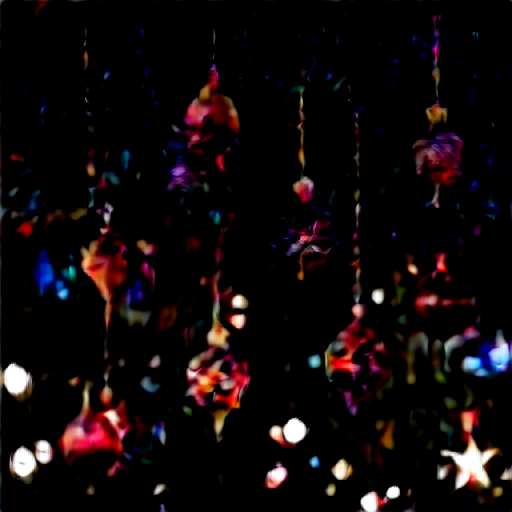

OH! I think I see "brightly colored lights are hanging from a tree in the dark"


In [8]:
prompt = "christmas tree"
from IPython.display import clear_output
for i in range(5):
    img = gen(prompt)

    clear_output()
    display(img)
    
    prompt = pipe(img)[0]['generated_text']
    print("OH! I think I see \"" + prompt + "\"")


In [10]:

kwords = pipeline("text2text-generation", model="google/flan-t5-large")

KeyboardInterrupt: 